In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
#python lists are heterogeneous
L3 = [True, "2", 3.0, 4]
print([type(item) for item in L3])

#python arrays little better - provides more efficient storage but not efficient operations on them
import array
L = list(range(10))
A = array.array('i', L); print(A)

#numpy arrays provide efficient array based storage as well as efficient operations - ufuncs, etc.
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

#BAD---->>>>>using list.append
import time
start = time.time()
for _ in range(10):
    my_list2=[]
    for e in my_list:
        my_list2.append(e*2)
elapsed_time = (time.time() - start)
#my_list2
print("t1 ",str(elapsed_time))


#BETTER----->>>>>>using list comprehension
import time
start = time.time()
for _ in range(10): my_list2 = [x * 2 for x in my_list]
elapsed_time = (time.time() - start)
#my_list2
print("t2 ",str(elapsed_time))

#BEST--------->>>>>>>>>>>>>>using numpy array
import time
start = time.time()
for _ in range(10): my_arr2 = my_arr * 2
elapsed_time = (time.time() - start)
#my_arr2
print("t3 ",str(elapsed_time))


[<class 'bool'>, <class 'str'>, <class 'float'>, <class 'int'>]
array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
t1  1.1021308898925781
t2  0.6244235038757324
t3  0.012956619262695312


In [18]:
all_points4 = np.random.random((1600,2))*20
cg = np.array([10,10]).reshape(1,2)
distances = np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1))

on_circle = all_points4[(np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) >= 7) & (np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) <= 8)]
out_circle = all_points4[~(np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) >= 7) | ~(np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) <= 8)]

(0.0, 20.0)

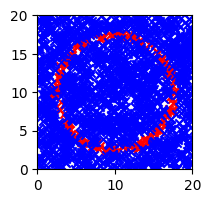

In [19]:
plt.figure(figsize=(2,2))
plt.scatter(on_circle[:,0],on_circle[:,1],marker='x',color = 'red')
plt.scatter(out_circle[:,0],out_circle[:,1],marker='x',color = 'blue')

plt.xlim(0,20)
plt.ylim(0,20)

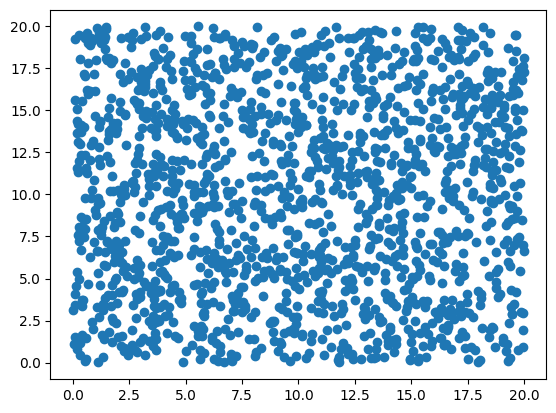

In [20]:
plt.scatter(all_points4[:,0],all_points4[:,1])

In [21]:
#initial_centers = centers = np.random.rand(4,2)*20;
all_cluster_centers = []
all_deltas = []
initial_centers = np.array([[9,9], [9,10],[10,10], [10,12]]) # works best
#initial_centers = np.array([[1,2], [1,3],[1,4], [1,5]])  # gives runtime warnings due to instability of the algorithm

all_cluster_centers.append(initial_centers.copy())
print('Initial centers:\n', initial_centers, '\n')
def cluster_algo(dataset, starting_centers):
    #distances = np.zeros((4,dataset.shape[0]))
    new_centers = starting_centers
    deltas = np.ones((4,2))*100000
    j= 0
    while abs(np.sum(deltas)) > 1:
        print('iteration: ',j)
        j += 1
        temp_old_centers = new_centers.copy()
        c2 = temp_old_centers[:,np.newaxis,:]
        distances = np.sqrt(np.sum(np.power(dataset-c2,2),axis=2))
        
        #for i in range(4):
        #    distances[i] = np.sqrt(np.sum(np.power(dataset-new_centers[i],2),axis=1))
        
        center_assigned = np.argmin(distances,axis=0)

        for i in range(4):
            # print('shape: ',dataset[center_assigned==i].shape)
            if dataset[center_assigned==i].shape[0] != 0:
                new_centers[i] = np.mean(dataset[center_assigned==i],axis=0)
            else:
                print('Empty slice case')
                new_centers[i] = new_centers[i] + 5
            
        #print('New centers:\n', new_centers, '\n')
        if np.any(temp_old_centers == 0):
            print('zero division possible')
            print(temp_old_centers)
            deltas = np.abs((new_centers - temp_old_centers)/(temp_old_centers+0.5)) *100
        else:
            deltas = np.abs((new_centers - temp_old_centers)/(temp_old_centers)) *100
        #print('Deltas:\n', deltas, '\n')
        #print('Total deltas: ',np.sum(deltas))
        all_cluster_centers.append(new_centers.copy())
        all_deltas.append(np.sum(deltas))
    return new_centers, np.sum(deltas)

nc,d = cluster_algo(all_points4,initial_centers)
print('Final cluster centers:\n', nc)
print('Final delta: ', d)
#print('All cluster centers:\n',all_cluster_centers)

Initial centers:
 [[ 9  9]
 [ 9 10]
 [10 10]
 [10 12]] 

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
Final cluster centers:
 [[ 4  4]
 [ 4 14]
 [14  4]
 [14 14]]
Final delta:  0.0


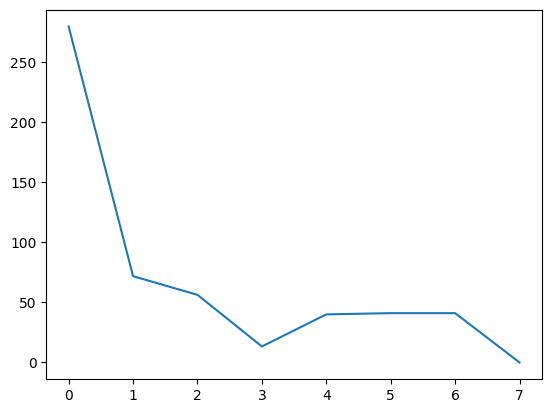

In [22]:
plt.plot(range(len(all_deltas)),all_deltas)

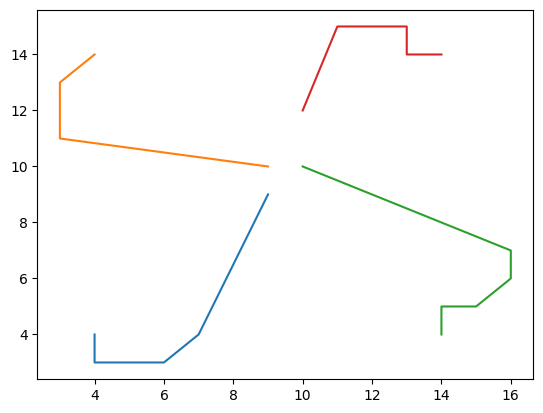

In [23]:
all_cluster_centers = np.array(all_cluster_centers)
plt.plot(all_cluster_centers[:,0,:][:,0],all_cluster_centers[:,0,:][:,1])
plt.plot(all_cluster_centers[:,1,:][:,0],all_cluster_centers[:,1,:][:,1])
plt.plot(all_cluster_centers[:,2,:][:,0],all_cluster_centers[:,2,:][:,1])
plt.plot(all_cluster_centers[:,3,:][:,0],all_cluster_centers[:,3,:][:,1])

In [24]:
######LINEAR ALGEBRA#########
#transpose of array / matrix
arr16 = np.arange(15).reshape(3,5); arr16
arr16.T

x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x.dot(y))
print(np.dot(x,y))
print(np.dot(y,x))
print(np.ones(3))
print(np.dot(x,np.ones(3)))

from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
print(X)
mat = X.T.dot(X); print(mat)
print(inv(mat))
print(np.absolute(np.round(mat.dot(inv(mat)))))

[[ 28.  64.]
 [ 67. 181.]]
[[ 28.  64.]
 [ 67. 181.]]
[[ 98. 127. 156.]
 [ 27.  33.  39.]
 [ 44.  61.  78.]]
[1. 1. 1.]
[ 6. 15.]
[[-0.84696738 -1.20871357  0.2604768  -0.25255628 -0.48681171]
 [ 1.64080743  0.39357492  0.08945048 -1.344722    0.30839654]
 [ 0.75214295  0.65560363 -0.04334119 -2.52746102  0.37534014]
 [ 0.41434017  0.04145349 -0.48916875  1.0404502   0.61832599]
 [-0.51864454  1.19368117 -2.62338598 -0.78986264 -1.11957227]]
[[ 4.41599173  1.5607089   1.05147942 -3.05277666  2.03749976]
 [ 1.5607089   3.47229896 -3.45981521 -2.78070713 -0.35491314]
 [ 1.05147942 -3.45981521  7.19916808  1.48663094  2.51911982]
 [-3.05277666 -2.78070713  1.48663094  9.96654074  0.28722787]
 [ 2.03749976 -0.35491314  2.51911982  0.28722787  2.10874339]]
[[ 1.03748273 -0.39368512 -0.00859732  0.24067375 -1.09120217]
 [-0.39368512  1.34566706  0.80541137  0.14553339 -0.37510526]
 [-0.00859732  0.80541137  0.78436299  0.12844449 -0.81063874]
 [ 0.24067375  0.14553339  0.12844449  0.2067294 

In [25]:
from numpy.linalg import inv
def f1(mat):
    if mat.ndim != 2:
        raise Exception('you need to provide a 2D matrix')
    if mat.shape[0]==mat.shape[1]:
        if np.sum( (np.absolute(np.round(np.dot(mat,inv(mat)))) != 
                    np.eye(mat.shape[0])).reshape(mat.shape[0]*mat.shape[1]))==0:
            return True
    return False     

In [26]:
from numpy.linalg import inv, LinAlgError
def f2(mat):
    try:
        if np.sum( (np.absolute(np.round(np.dot(mat,inv(mat)))) != 
                    np.eye(mat.shape[0])).reshape(mat.shape[0]*mat.shape[1]))==0:
            return True
    except LinAlgError:
        print('you need to provide a 2D square matrix')

In [27]:
mat1 = np.random.randint(1,10,25).reshape(5,5); mat1

array([[1, 7, 9, 3, 7],
       [4, 4, 5, 2, 3],
       [4, 7, 5, 1, 2],
       [1, 2, 2, 6, 8],
       [4, 8, 2, 7, 6]])

In [28]:
f1(mat1)

True

In [29]:
#f1(np.random.randint(1,10,25))  # will give an error
f2(np.random.randint(1,10,25))

you need to provide a 2D square matrix


In [30]:
f2(np.random.randint(1,10,12).reshape(4,3))

you need to provide a 2D square matrix


In [42]:
n1 = np.random.randint(0,12,40).reshape(10,4).astype(object); n1

array([[11, 2, 10, 6],
       [6, 11, 9, 11],
       [3, 1, 7, 11],
       [3, 10, 8, 8],
       [3, 9, 3, 5],
       [10, 2, 4, 0],
       [9, 9, 8, 7],
       [8, 8, 3, 4],
       [0, 9, 9, 7],
       [7, 4, 8, 3]], dtype=object)

In [43]:
n1[n1[:,1]==10,1]='B'

In [44]:
n1[:,0][n1[:,0]=='A']

array([], dtype=object)

In [45]:
n1

array([[11, 2, 10, 6],
       [6, 11, 9, 11],
       [3, 1, 7, 11],
       [3, 'B', 8, 8],
       [3, 9, 3, 5],
       [10, 2, 4, 0],
       [9, 9, 8, 7],
       [8, 8, 3, 4],
       [0, 9, 9, 7],
       [7, 4, 8, 3]], dtype=object)

In [35]:
n2 = np.arange(10).astype(object)

In [36]:
n2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [37]:
n2[3]

3

In [38]:
n2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [39]:
weather = np.genfromtxt('weatherdata.csv',delimiter=',',dtype='U'); weather

FileNotFoundError: weatherdata.csv not found.

In [ ]:
header = weather[0].copy(); header

array(['outlook', 'temperature', 'humidity', 'windy', 'play'],
      dtype='<U11')

In [ ]:
weather = weather[1:]; weather

array([['sunny', 'hot', 'high', 'false', 'no'],
       ['sunny', 'hot', 'high', 'true', 'no'],
       ['overcast', 'hot', 'high', 'false', 'yes'],
       ['rainy', 'mild', 'high', 'false', 'yes'],
       ['rainy', 'cool', 'normal', 'false', 'no'],
       ['rainy', 'cool', 'normal', 'true', 'no'],
       ['overcast', 'cool', 'normal', 'true', 'yes'],
       ['sunny', 'mild', 'high', 'false', 'no'],
       ['sunny', 'cool', 'normal', 'false', 'yes'],
       ['rainy', 'mild', 'normal', 'false', 'yes'],
       ['sunny', 'mild', 'normal', 'true', 'yes'],
       ['overcast', 'mild', 'high', 'true', 'yes'],
       ['overcast', 'hot', 'normal', 'false', 'yes'],
       ['rainy', 'mild', 'high', 'true', 'no']], dtype='<U11')

In [ ]:
unique_labels = [np.unique(weather[:,i]) for i,c in enumerate(header)]; unique_labels

[array(['overcast', 'rainy', 'sunny'], dtype='<U11'),
 array(['cool', 'hot', 'mild'], dtype='<U11'),
 array(['high', 'normal'], dtype='<U11'),
 array(['false', 'true'], dtype='<U11'),
 array(['no', 'yes'], dtype='<U11')]

In [ ]:
for j,v in enumerate(unique_labels):
    #print(f'j: {j} v: {v}')
    for i,u in enumerate(v):
        #print(f'j: {j} u: {u} i: {i}')
        weather[weather[:,j]==u,j]=i

In [ ]:
weather

array([['2', '1', '0', '0', '0'],
       ['2', '1', '0', '1', '0'],
       ['0', '1', '0', '0', '1'],
       ['1', '2', '0', '0', '1'],
       ['1', '0', '1', '0', '0'],
       ['1', '0', '1', '1', '0'],
       ['0', '0', '1', '1', '1'],
       ['2', '2', '0', '0', '0'],
       ['2', '0', '1', '0', '1'],
       ['1', '2', '1', '0', '1'],
       ['2', '2', '1', '1', '1'],
       ['0', '2', '0', '1', '1'],
       ['0', '1', '1', '0', '1'],
       ['1', '2', '0', '1', '0']], dtype='<U11')

In [ ]:
weather = weather.astype(np.int32)

array([[2, 1, 0, 0, 0],
       [2, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 2, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [2, 2, 0, 0, 0],
       [2, 0, 1, 0, 1],
       [1, 2, 1, 0, 1],
       [2, 2, 1, 1, 1],
       [0, 2, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [1, 2, 0, 1, 0]], dtype=int32)